## Support Vector Machines

The Support Vector Machine is a supervised algorithm is capable of performing classification, regression, and outlier detection. But, it is widely used in classification objectives. SVM is known as a fast and dependable classification algorithm that performs well even on less amount of data.

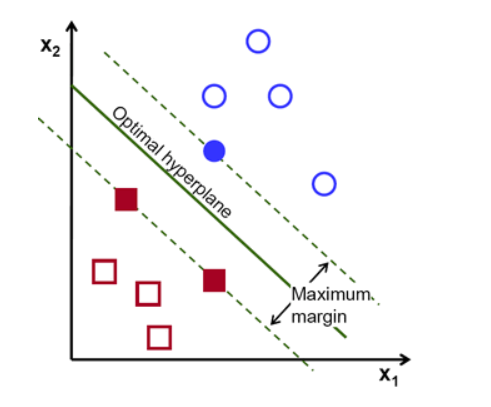

- SVM finds the best N-dimensional hyperplane in space that classifies the data points into distinct classes. 
- Support Vector Machines uses the concept of ‘Support Vectors‘, which are the closest points to the hyperplane.
- A hyperplane is constructed in such a way that distance to the nearest element(support vectors) is the largest.
- The better the gap, the better the classifier works.

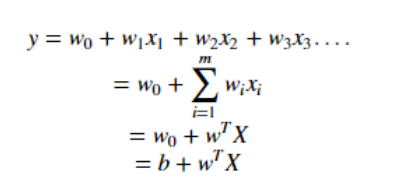

where Wi = vectors (W0, W1, W2, W3....)
      ,b  = biased term(W0)
      ,X  = variables

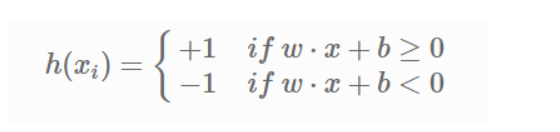

- The point above or on the hyperplane will be classified as class +1, and the point below the hyperplane will be classified as class -1.


## Kernels

In the SVM classifier, it is easy to have a linear hyper-plane between these two classes. But, another burning question which arises is, should we need to add this feature manually to have a hyper-plane. No, the SVM  algorithm has a technique called the **kernel** trick.
- The SVM kernel is a function that takes low dimensional input space and transforms it to a higher dimensional space i.e. it converts not separable problem to separable problem.
- It helps us to deal with non-linear separation problems. Simply put, it does some extremely complex data transformations, then finds out the method to separate the data points based on the target classes you’ve defined.

### Popular SVM Kernel Functions

#### Linear Kernel

- It is the most basic type of the kernel, usually one dimentional in nature
- It proves to be the best function when there are lots of features.
- Linear functions are faster than other functions

#### Polynomial Kernel
- It is a more generalized representation of the linear kernel.
- It is not as preferred as other kernel functions as it is less efficient and accurate.

#### Radial Basis Function
- It is one of the most preferred and used kernel functions in svm. 
- It is usually chosen for non-linear data. 
- It helps to make proper separation when there is no prior knowledge of data.

#### Sigmoid Kernel
- It is mostly preferred for neural networks. 
- This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.
- It can be shown as, Sigmoid Kenel Function

### Important Points

- Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. 

#####  Advantages :
- It has a high level of accuracy
- It works very well with limited datasets
- Kernel SVM contains a non-linear transformation function to convert the complicated non-linearly separable data into linearly separable data
- It is effective on datasets that have multiple features
- It is effective when the number of features are greater than the number of data points
- It employs a subset of training points in the decision function or support vectors, making SVM memory efficient
- Apart from common kernels, it is also possible to specify custom kernels for the decision function

##### Disadvantages :
- Does not work well with larger datasets
- Sometimes, training time with SVMs can be high
- If the number of features is significantly greater than the number of data points, it is crucial to avoid overfitting when choosing kernel functions and regularization terms
- Probability estimates are not directly provided by SVMs; rather, they are calculated by using an expensive fivefold cross-validation
- It works best on small sample sets due to its high training time

### Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv("../datasets/Breast_cancer_data.csv")
ds.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [4]:
x = ds.drop(['diagnosis'], axis = 1)
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [5]:
y = ds['diagnosis']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.25)

In [8]:
from sklearn.svm import SVC

In [21]:
sv_classifier = SVC(kernel='linear')

In [22]:
sv_classifier.fit(xtrain,ytrain)

SVC(kernel='linear')

In [23]:
ypred = sv_classifier.predict(xtest)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
accuracy_score(ytest,ypred)

0.8671328671328671

In [26]:
confusion_matrix(ytest,ypred)

array([[45, 11],
       [ 8, 79]], dtype=int64)

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        56
           1       0.88      0.91      0.89        87

    accuracy                           0.87       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.87      0.87      0.87       143



#### Ploynomial kernel

In [28]:
svc = SVC(kernel='poly', degree=8)

In [29]:
svc.fit(xtrain,ytrain)

SVC(degree=8, kernel='poly')

In [30]:
y_pred = svc.predict(xtest)

In [32]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82        56
           1       0.84      0.98      0.90        87

    accuracy                           0.87       143
   macro avg       0.90      0.85      0.86       143
weighted avg       0.88      0.87      0.87       143



#### Radial basis function

In [33]:
svvc = SVC(kernel='rbf')

In [34]:
svvc.fit(xtrain,ytrain)

SVC()

In [35]:
y_pred1 = svvc.predict(xtest)

In [37]:
print(classification_report(ytest,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82        56
           1       0.85      0.97      0.90        87

    accuracy                           0.87       143
   macro avg       0.89      0.85      0.86       143
weighted avg       0.88      0.87      0.87       143



#### Sigmoid function

In [38]:
svc1 = SVC(kernel='sigmoid')

In [39]:
svc1.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

In [40]:
ypred1 = svc1.predict(xtest)

In [42]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.13      0.09      0.11        56
           1       0.51      0.62      0.56        87

    accuracy                           0.41       143
   macro avg       0.32      0.35      0.33       143
weighted avg       0.36      0.41      0.38       143

